# **Multi-Class classification on fashion Mnist dataset using CNN model**

Contributed by Sayak Bhattacharya

Github [GDSC TMSL ML WORKSHOP 2023](https://github.com/GDSC-TMSL/ML-Study-Jams-2023/tree/main/ML_Study_Jam/Computer_Vision)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

## **Classifying Fashion MNIST classes by building a DL model with Keras functional API**

In [ ]:
#Loading in the data from Keras's datasets

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Training Dataset size: ",x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training Dataset size:  (60000, 28, 28)


### **As we can see from the above Training dataset dimensions, there are only 3 dimensions of the form N * W * H, but, for training a CNN, we need data of the dimension N * W * H * C (No. of training examples, Width, Height, Colour Channel)** 

In [ ]:
# Adding 1 extra dimension in training and testing set

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Calculating no. of classes

K = len(set(y_train))
print('No of classes in output set is: ',K)

No of classes in output set is:  10


In [ ]:
# Building the model using Keras functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compiling and fitting the Model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5242 - accuracy: 0.8060 - val_loss: 0.4076 - val_accuracy: 0.8442
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3620 - accuracy: 0.8626 - val_loss: 0.3591 - val_accuracy: 0.8642
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3146 - accuracy: 0.8813 - val_loss: 0.3567 - val_accuracy: 0.8647
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2829 - accuracy: 0.8938 - val_loss: 0.3024 - val_accuracy: 0.8880
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2561 - accuracy: 0.9030 - val_loss: 0.2979 - val_accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2371 - accuracy: 0.9110 - val_loss: 0.3056 - val_accuracy: 0.8886
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2174 - accuracy: 0.9171 - val_loss: 0.2892 - val_accuracy

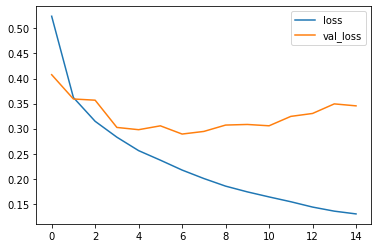

In [ ]:
# Plotting loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

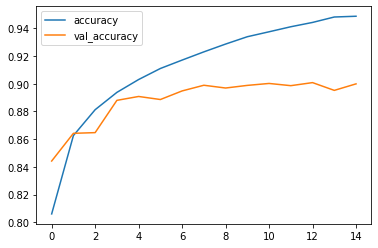

In [ ]:
# Plotting accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
# Evaluating our model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8999
[0.34543880820274353, 0.8999000191688538]


## **Plotting a Confusion Matrix for the classification**

313/313 [==============================] - 1s 2ms/step
Confusion Matrix, without normalization
[[836   1  23  22   2   2 106   0   8   0]
 [  5 974   0  12   2   0   3   0   4   0]
 [ 24   0 879  10  27   1  57   0   2   0]
 [ 14   3  17 922  23   0  21   0   0   0]
 [  0   1 103  27 775   0  92   0   2   0]
 [  1   1   0   0   0 964   0  18   1  15]
 [103   0  63  27  56   0 744   0   7   0]
 [  0   0   0   0   0   8   0 972   0  20]
 [  3   0   5   4   2   2   3   2 978   1]
 [  1   0   0   0   0   4   0  40   0 955]]


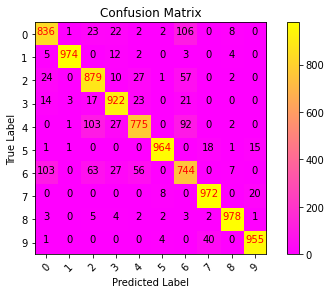

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize='False', title='Confusion Matrix', cmap='spring'):

  # This function returns a confusion matrix. Normalization can be applied by setting normalize=True

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] #astype() is used to convert a pandas object to a particular datatype
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix, without normalization')
  
  print(cm)

  #used when display resolution and image resolution are not same(Displays the exact image)
  plt.imshow(cm, interpolation='nearest', cmap=cmap) 

  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes)) # No. of tick marks generated as per the no of classes
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format( cm[i, j], fmt), horizontalalignment = 'center', color = 'red' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)), False) # Sending the confusion matrix and 10 class indexes to the plot function

## **Showing misclassified examples**

Text(0.5, 1.0, 'True Label:Pullover   Predicted Label:T-shirt/top')

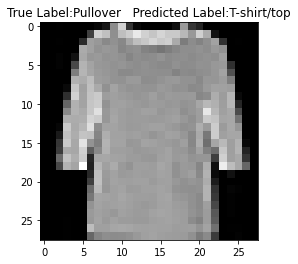

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f'True Label:{labels[y_test[i]]}   Predicted Label:{labels[p_test[i]]}')